#### EX 2 PRE-PROCESSING-DATA/movies.dat

In [137]:
import matplotlib.pyplot as plt
import pandas as pd
import re              # importo llibreries pandas i re ( per expressions regulars)

pelis= pd.read_csv("movies.dat", encoding="ansi", sep="::", names=['titol', 'genere'], engine="python")

                       # el fitxer "movies.dat" es pot obrir sense dificultat si el encoding es tipus ansi,  i especificant
                       #  que cal que el fitxer el separi  per ::
                       # que mostri  les columnes titol  i génere
                       # motor entorn python
                
                
pelis                  #el dataset mostra titol amb el any tot a la mateixa columna
                       # la columna genere te tots els generes separats per |
                




,titol,genere
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy
...,...,...
3948,Meet the Parents (2000),Comedy
3949,Requiem for a Dream (2000),Drama
3950,Tigerland (2000),Drama
3951,Two Family House (2000),Drama


In [98]:
    # expressions regulars                                  busco com puc separar l'any del t´tol de la peli 
any = []                                                    # llista any buida
    for titol in pelis['titol']:                           #per els noms de películes de la columna titol  del dataframe pelis
        any.append(re.search('\d{4}', titol).group())      #afegeixo a la llista any, i usant les expressions regulars
                                                       # de la llibreria re la funció search busca '\ d = valors numérics 
                                                       #i li dic que busqui 4  {4}  '

pelis['any'] = any                          # la llista any la paso a la columna de la dataset pelis
 
genere_unic = []                           # creo una llista buida que es diu genere_unic

    for genere in pelis['genere']:             # recorro la columna genere del dataframe pelis
    
        genere_unic.append(genere.split('|')[0])    #  genere_unic va guardant el genere que troba a la posició [0]
                                                # split separa els generes pq estan separats per | 
pelis['genere'] = genere_unic 
                                                # mostro la columna genere  que només te un genere  

pelis

,titol,genere,any
1,Toy Story (1995),Animation,1995
2,Jumanji (1995),Adventure,1995
3,Grumpier Old Men (1995),Comedy,1995
4,Waiting to Exhale (1995),Comedy,1995
5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...
3948,Meet the Parents (2000),Comedy,2000
3949,Requiem for a Dream (2000),Drama,2000
3950,Tigerland (2000),Drama,2000
3951,Two Family House (2000),Drama,2000


### Ex 3

In [71]:
pelis.describe()




,titol,genere,any
count,3883,3883,3883
unique,3883,18,88
top,Toy Story (1995),Drama,1996
freq,1,1176,344


In [55]:
pelis.genere.value_counts()

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: genere, dtype: int64

Text(0.5, 0, 'freqüència')

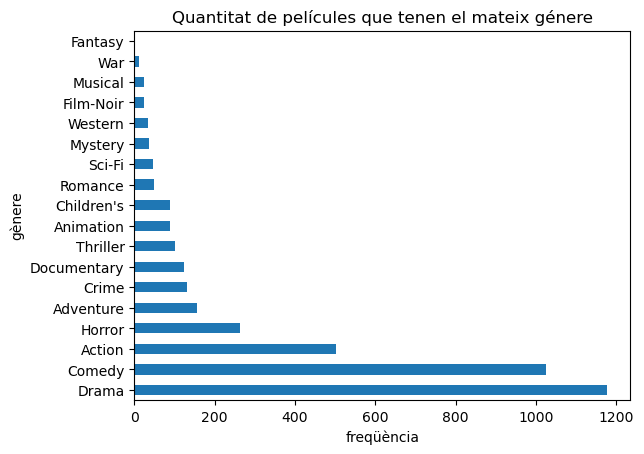

In [99]:
serie=pelis.genere.value_counts()
serie.plot.barh()                 # gràfica de barres horitzontals per llegir millor els gèneres
plt.ylabel('gènere')
plt.title('Quantitat de películes que tenen el mateix génere')
plt.xlabel('freqüència')

In [104]:
serie3=pelis['genere'].value_counts()   #serie3 té els valors dels diferents gèneres
      


serie3

Drama          1176
Comedy         1024
Action          503
Horror          262
Adventure       155
Crime           131
Documentary     123
Thriller        101
Animation        90
Children's       89
Romance          50
Sci-Fi           46
Mystery          36
Western          33
Film-Noir        25
Musical          25
War              12
Fantasy           2
Name: genere, dtype: int64

Text(0.5, 0, '')

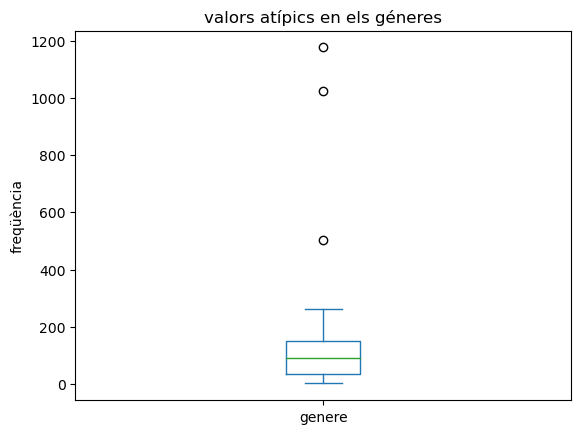

In [136]:
serie3.plot.box() # amb aquest diagrama de caixes, puc dir que hi ha tres gèneres que están
                  #fora de la mitja son valors atípics
                  #els altres generes s'acosten a la mitja i els bigotis ens donen la variabilitat fora dels quartils
plt.ylabel('freqüència')
plt.title('valors atípics en els géneres')
plt.xlabel('')                 

In [128]:
serie3.mean()      #mitja

215.72222222222223

In [129]:
serie3.std()     #desviació estandard

343.5533703817409

In [130]:
serie3.sum()     # números registres

3883

In [133]:
serie3.describe()   # informació de serie3

count      18.000000
mean      215.722222
std       343.553370
min         2.000000
25%        33.750000
50%        89.500000
75%       149.000000
max      1176.000000
Name: genere, dtype: float64